In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y =make_regression(n_samples=4, n_features=1,n_informative=1,n_targets=1,
                     noise=80,random_state=13)

In [3]:
import matplotlib.pyplot as plt

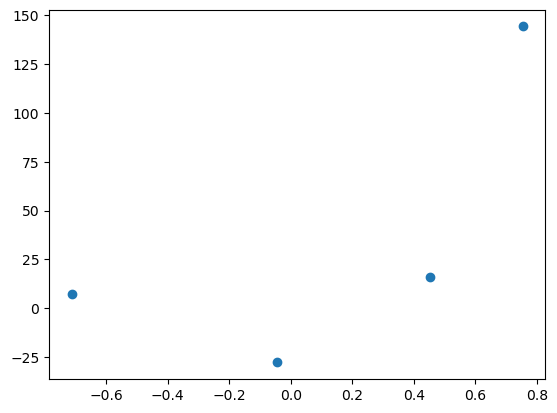

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

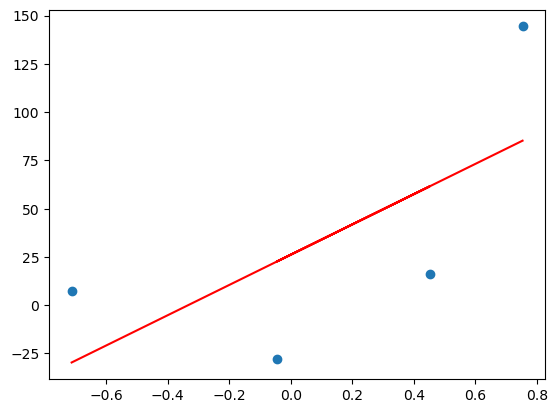

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r')

In [42]:
# m=78.35 and b=0(random)

y_pred_b0=((78.35*X)+0).reshape(4)
y_pred_b0

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

In [43]:
X,y_pred_b0

(array([[-0.71239066],
        [ 0.45181234],
        [-0.04450308],
        [ 0.75376638]]),
 array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577]))

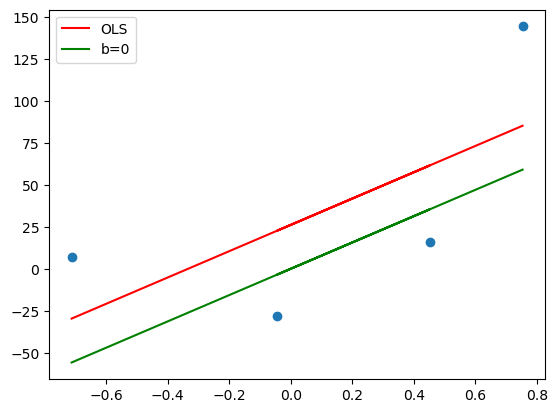

In [44]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r',label='OLS')
plt.plot(X,y_pred_b0,'g',label='b=0')
plt.legend()
plt.show()

In [33]:
#for b=0 loss function:

m=78.35
b=0

loss_slope = -2*np.sum(y- m*X.ravel()-b)
loss_slope

-209.27763408209216

In [34]:
#calculating stepsize for learning rate=0.1
lr=0.1
step_size= lr*loss_slope
step_size

-20.927763408209216

In [49]:
bn1=b-step_size
bn1

20.927763408209216

In [50]:
y_pred1 = (78.35*X+bn1).ravel()
y_pred1

array([-34.88804496,  56.32726015,  17.44094722,  79.98535918])

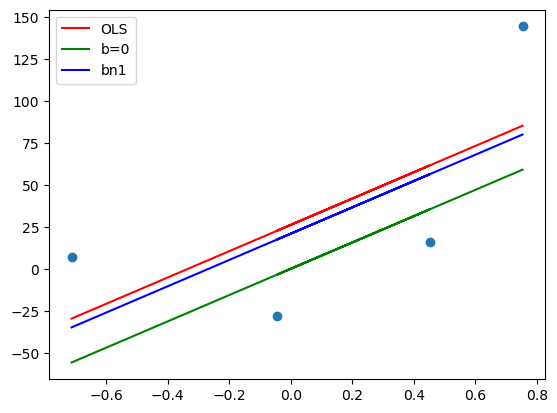

In [51]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r',label='OLS')
plt.plot(X,y_pred_b0,'g',label='b=0')
plt.plot(X,y_pred1,'b',label='bn1')
plt.legend()
plt.show()

In [52]:
loss_slope2 = -2*np.sum(y-78.35*X.ravel()-bn1)
loss_slope2

-41.85552681641843

In [53]:
step_size = lr*loss_slope2
step_size

-4.185552681641844

In [54]:
bn2=bn1-step_size
bn2

25.11331608985106

In [58]:
y_pred2=(78.35*X+bn2).ravel()

(array([-30.70249228,  60.51281283,  21.6264999 ,  84.17091186]),
 array([-34.88804496,  56.32726015,  17.44094722,  79.98535918]))

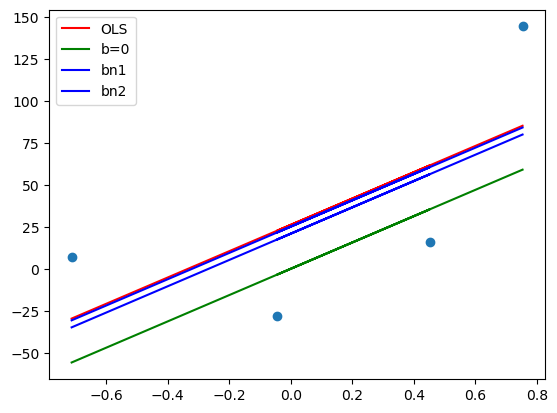

In [59]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r',label='OLS')
plt.plot(X,y_pred_b0,'g',label='b=0')
plt.plot(X,y_pred1,'b',label='bn1')
plt.plot(X,y_pred2,'b',label='bn2')
plt.legend()
plt.show()

In [63]:
loss_slope3 = -2*np.sum(y-(78.35*X.ravel())-bn2)
loss_slope3

-8.371105363283675

In [64]:
step_size=lr*loss_slope3

In [69]:
bn3=bn2-step_size
bn3

25.95042662617943

In [72]:
y_pred3=(78.35*X+bn3).ravel()
y_pred3

array([-29.86538175,  61.34992337,  22.46361044,  85.00802239])

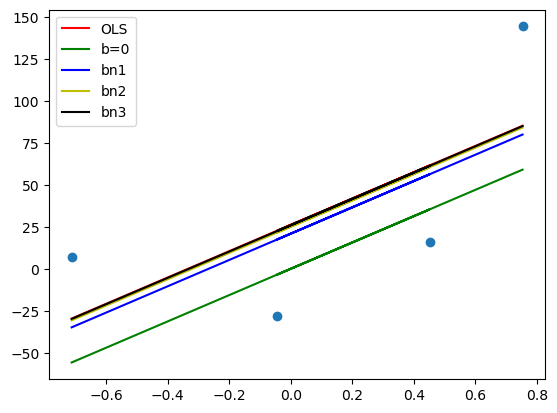

In [74]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'r',label='OLS')
plt.plot(X,y_pred_b0,'g',label='b=0')
plt.plot(X,y_pred1,'b',label='bn1')
plt.plot(X,y_pred2,'y',label='bn2')
plt.plot(X,y_pred3,'black',label='bn3')
plt.legend()
plt.show()

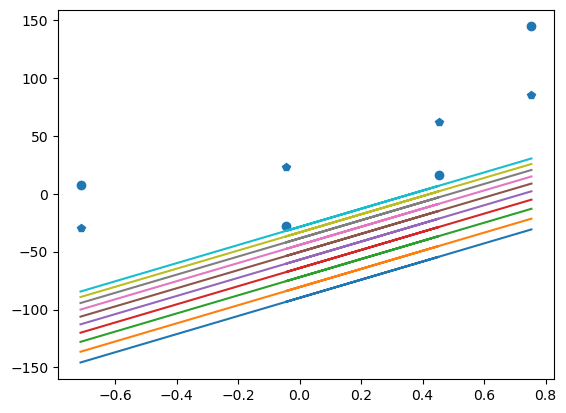

In [94]:
b=-100
m=78.35
lr=0.01
epochs=10

for i in range(epochs):
    slope=-2*np.sum(y-m*X.ravel()-b)
    b=b-(lr*slope)
    y_p=m*X.ravel()+b
    
    plt.plot(X,y_p)
plt.scatter(X,y)
plt.plot(X,reg.predict(X),'p')

In [315]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score

In [301]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,
                     noise=20,random_state=13)

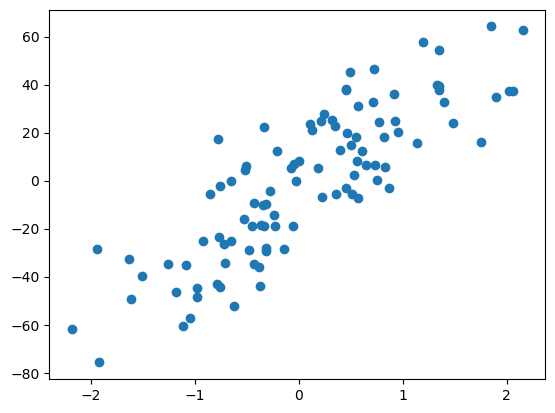

In [302]:
plt.scatter(X,y)

In [345]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=2)

In [309]:
lr=LinearRegression()

In [310]:
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)

[28.12597332] -2.2710144261783816


In [335]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [285]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

In [341]:
class GDReg:
    def __init__(self,lr,epochs):
        self.m=100
        self.b=-120
        self.lr=lr
        self.epochs=epochs
    def fit(self,X,y):
        # calculate b using gradient descent
        for i in range(self.epochs):
            slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            slope_m= -2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.m=self.m-(self.lr*slope_m)
            self.b=self.b-(self.lr*slope_b)
        print('m=',self.m,'b=',self.b)
    
    def predict(self,X):
        return self.m*X + self.b

In [347]:
gd=GDReg(0.001,50)

In [348]:
gd.fit(X_train,y_train)

m= 28.159367347119066 b= -2.3004574196824854


In [349]:
y_pred = GDReg.predict(X_test)
r2_score(y_test,y_pred)

TypeError: GDReg.predict() missing 1 required positional argument: 'X'